In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.interpolate import LinearNDInterpolator
from scipy.interpolate import NearestNDInterpolator

In [2]:
data=pd.read_csv('D:/Research Working Folder/Paper_1-Mobile Sensing Virtual Environment/dynamic_50cm_DEMO_new.csv')

In [3]:
data

,X,Y,Z,0.0,1.0,2.0,3.0,4.0,5.0,6.0,...,2591.0,2592.0,2593.0,2594.0,2595.0,2596.0,2597.0,2598.0,2599.0,2600.0
0,-0.500000,0.000000,0.5,300.0,300.000519,300.000855,300.000671,300.000488,300.000336,300.000275,...,300.000183,300.000183,300.000183,300.000183,300.000183,300.000244,300.000244,300.000244,300.000244,300.000244
1,-0.500000,0.096677,0.5,300.0,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,...,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
2,-0.500000,0.213652,0.5,300.0,300.000030,300.000030,300.000030,300.000030,300.000030,300.000030,...,300.000030,300.000030,300.000030,300.000030,300.000030,300.000030,300.000030,300.000030,300.000030,300.000030
3,-0.500000,0.274038,0.5,300.0,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,...,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
4,-0.500000,0.357580,0.5,300.0,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,...,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13977,73.550003,9.334162,0.5,300.0,300.001587,300.004394,300.007019,300.009644,300.012146,300.014618,...,297.280792,297.285675,297.290527,297.295410,297.300293,297.305237,297.310181,297.315125,297.320251,297.325440
13978,73.550003,10.003136,0.5,300.0,300.001892,300.005066,300.007935,300.010864,300.013641,300.016449,...,297.424500,297.435272,297.446045,297.456757,297.467529,297.478272,297.489014,297.499786,297.510498,297.521332
13979,73.550003,10.822544,0.5,300.0,300.002045,300.005279,300.008331,300.011292,300.014130,300.016998,...,297.508667,297.520142,297.531372,297.542236,297.552856,297.563110,297.572998,297.582550,297.591736,297.600555
13980,73.550003,11.621329,0.5,300.0,300.001495,300.004059,300.006439,300.008697,300.010925,300.013031,...,297.605682,297.613342,297.620239,297.626465,297.631928,297.636719,297.641052,297.644806,297.648071,297.650757


In [5]:
target_time='2000.0'

In [6]:
x=data.iloc[:,0]
y=data.iloc[:,1]
T=data[target_time]
X = np.linspace(min(x), max(x), 100)
Y = np.linspace(min(y), max(y), 100)
X, Y = np.meshgrid(X, Y)

In [7]:
interp = LinearNDInterpolator(list(zip(x, y)), T)
Z = interp(X, Y)

In [8]:
delta=1.5

for i in range(100):
    for j in range(100):
        bb=np.array([X[0,i], Y[j,0]])
        judge_array=[0,0,0,0]
        window_data=data.loc[(data['X']>(bb[0]-delta)) & (data['X']<(bb[0]+delta)) & 
        (data['Y']>(bb[1]-delta)) & (data['Y']<(bb[1]+delta)), ['X', 'Y']]
        judge_array[0]=window_data.loc[(window_data['X']<bb[0]) & (window_data['Y']<bb[1])].empty
        judge_array[1]=window_data.loc[(window_data['X']<bb[0]) & (window_data['Y']>bb[1])].empty
        judge_array[2]=window_data.loc[(window_data['X']>bb[0]) & (window_data['Y']<bb[1])].empty
        judge_array[3]=window_data.loc[(window_data['X']>bb[0]) & (window_data['Y']>bb[1])].empty
        if True in judge_array:
            Z[j,i]=np.nan 

(-0.5, 73.55, -3.0, 22.95)

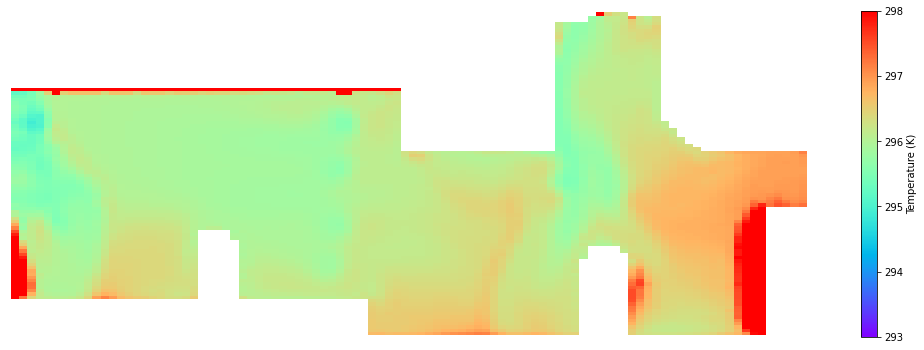

In [13]:
fig, ax=plt.subplots(1,1,figsize=(18,6))
im=ax.pcolormesh(X, Y, Z, shading='auto', cmap='rainbow', vmin=293, vmax=298)


ax.set_xlim(-0.5,73.55)
ax.set_ylim(-3,22.95)
cbar=fig.colorbar(im, orientation='vertical', label='Temperature (K)')

ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.axis('off')